# Heart Disease Prediction

### Imports

In [1]:
# Data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

### Data
First step will be getting to know the data. To do this I will:
* Load the data
* Check for missing values
* Check for data types
* Check for distribution of the target
* Plot some visualizations to get better understanding of the data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


After checking we see that there are no missing values.

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


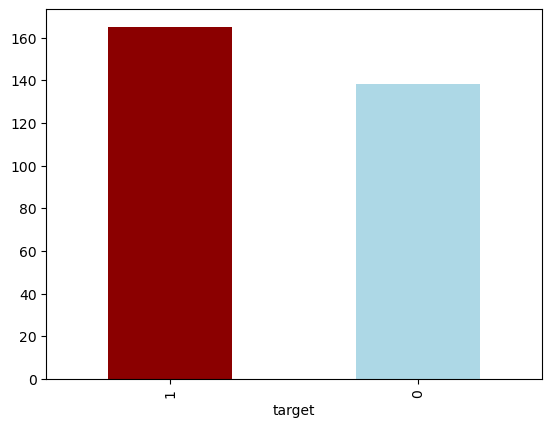

In [4]:
df['target'].value_counts().plot(kind='bar', color=['darkred', 'lightblue']);

**Heart Disease Frequency according to Sex**

In [5]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [6]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


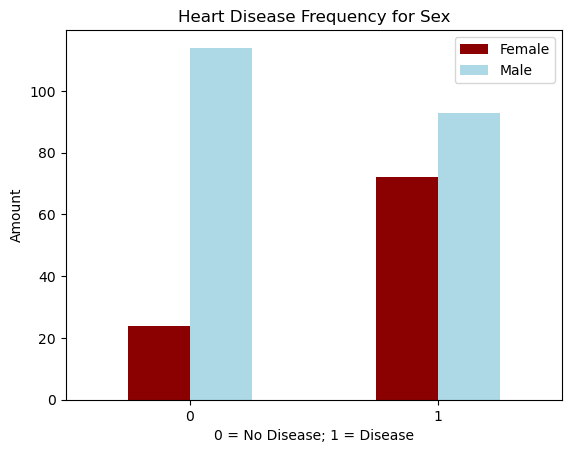

In [7]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['darkred', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.ylabel('Amount')
plt.xlabel('0 = No Disease; 1 = Disease')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

**Age vs Max Heart Rate for Heart Disease**

In [8]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

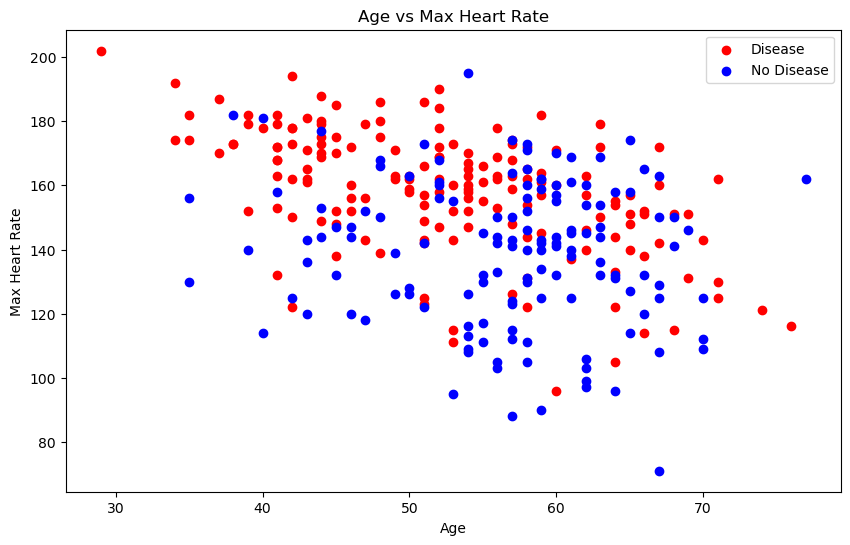

In [9]:
# Create scatter plot for visualization
plt.figure(figsize=(10,6))

# Hert Disease = 1
plt.scatter(
    df.age[df['target'] == 1],
    df.thalach[df['target'] == 1],
    c='red'
)
# Hert Disease = 0
plt.scatter(
    df.age[df['target'] == 0],
    df.thalach[df['target'] == 0],
    c='blue'
)

plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show();

**Checking distribution of the Age**

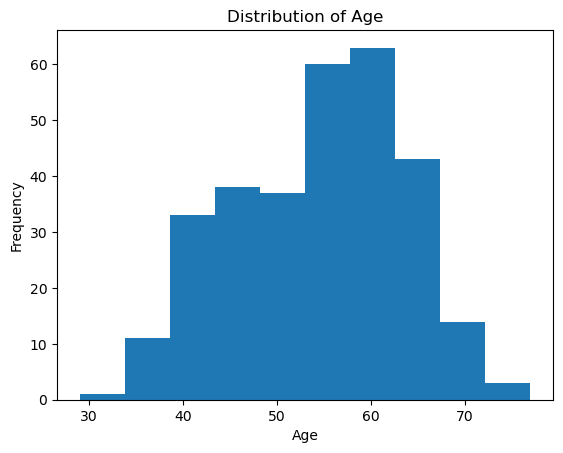

In [10]:
df.age.plot(kind='hist')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show();

**Chest Pain Type Frequency per Heart Disease** 

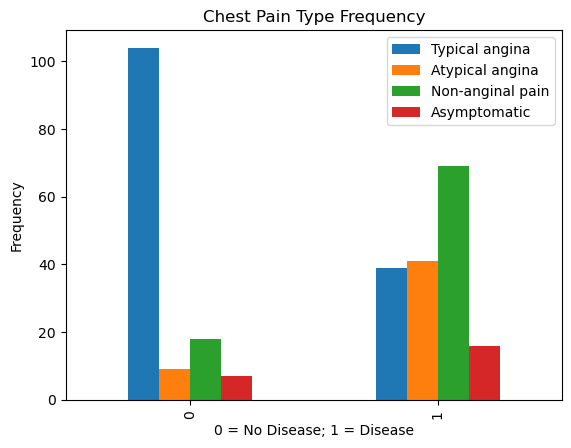

In [11]:
pd.crosstab(df.target, df.cp).plot(kind='bar')
plt.title('Chest Pain Type Frequency')
plt.ylabel('Frequency')
plt.xlabel('0 = No Disease; 1 = Disease')
plt.legend(['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.show();

**Correlation between all features**

In [12]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

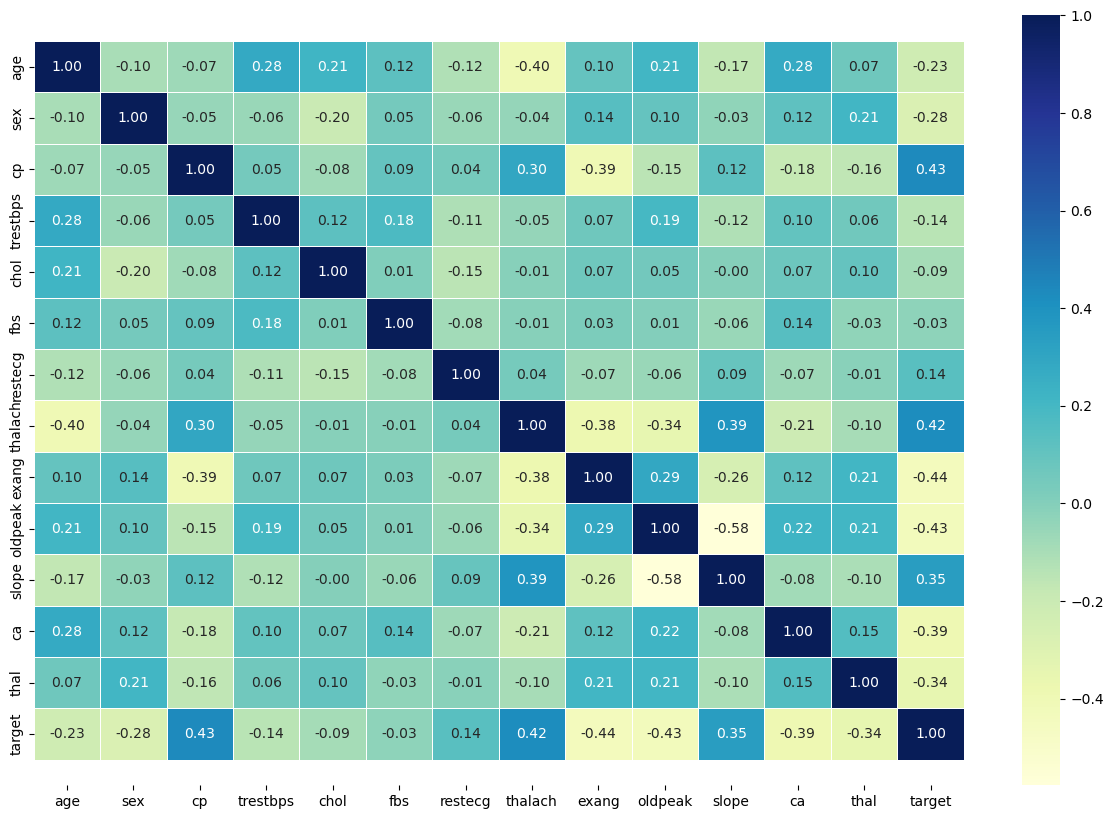

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(
    data=corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt='.2f',
    cmap='YlGnBu'
)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Models
After getting to know the data I will start with creating models.

In [39]:
# Spliting data
X = df.drop('target', axis=1)
y = df['target']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

After doing a research I decided to try (at first) these three models:
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [40]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Function to fit and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models : dict of sklearn models
    X_train : training data
    X_test : testing data
    y_train : training labels
    y_test : testing labels
    """
    np.random.seed(42)  
    models_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

In [41]:
model_scores = fit_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

c:\Users\szymo\miniconda3\envs\Projekt_BO2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

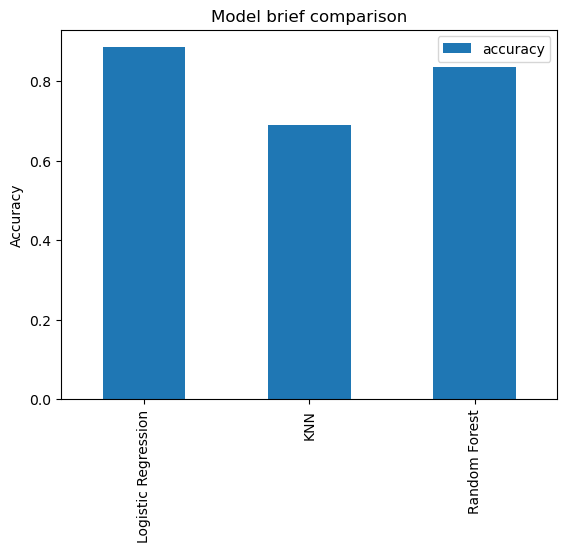

In [42]:
# Model comparison plot
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar')
plt.title('Model brief comparison')
plt.ylabel('Accuracy');

### Hyperparameter tuning

Basing on first results I decided to focus on tuning following models:
* Logistic Regression
* Random Forest

In [43]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
    'penalty': ['l1', 'l2', 'elasticnet']
}

rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

**Logistic Regression**

First tunes using RandomizedSearchCV()

In [51]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_lr_model = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=100,
    verbose=True
)

rs_lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\szymo\miniconda3\envs\Projekt_BO2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\szymo\miniconda3\envs\Projekt_BO2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg',
                                                   'newton-cholesky']},
                   verbose=True)

In [52]:
rs_lr_model.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.23357214690901212}

In [53]:
rs_lr_model.score(X_test, y_test)

0.8852459016393442

**Random Forest** 

First tunes using RandomSearchCV()

In [22]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_rf_model.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [24]:
rs_rf_model.score(X_test, y_test)

0.8688524590163934

#### Logistic Regression

Since Logistic Regression model provides the best scores so far. After brief testing I decide to pursue tuning Logistic Regression model, but now using GridSearchCV().

In [25]:
# This time parameter 'C' has more points to try

log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky'],
    'penalty': ['l1', 'l2', 'elasticnet']
}

gs_lr_model = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

gs_lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\szymo\miniconda3\envs\Projekt_BO2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\szymo\miniconda3\envs\Projekt_BO2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky']},
             verbose=True)

In [26]:
gs_lr_model.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [27]:
gs_lr_model.score(X_test, y_test)

0.8852459016393442

#### Model score
So as we can see the score we got is more than 0.88 which is a good result.

## Evaluating tuned model

In this section I will evaluate previously tuned model (Logistic Regression). 
To do so I will use following metrics:
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

In [28]:
# Make predictions for comparison
y_pred = gs_lr_model.predict(X_test)

#### ROC curve & AUC score

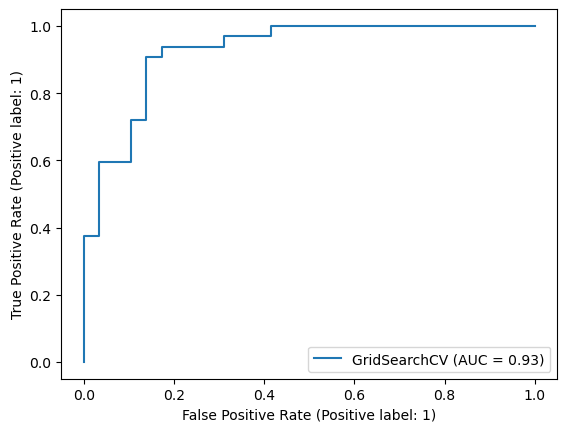

In [29]:
# Plot ROC curve & calculate AUC score
RocCurveDisplay.from_estimator(gs_lr_model, X_test, y_test)

#### Confusion matrix

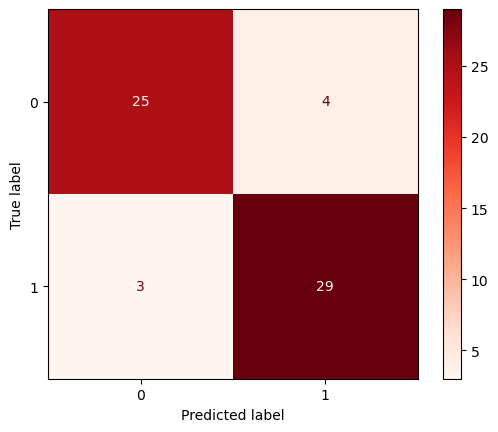

In [30]:
ConfusionMatrixDisplay.from_estimator(gs_lr_model, X_test, y_test, cmap='Reds')

#### Classification Report

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Precision & Recall & F1-score

To calculate these metrics for getting more accurate results I will use cross-validation.

In [32]:
# Creating new model, so there won't be unnecessary computations
best_param = gs_lr_model.best_params_

clf = LogisticRegression(**best_param)
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [33]:
precision = np.mean(cross_val_score(clf, X, y, cv=10,  scoring='precision'))

recall = np.mean(cross_val_score(clf, X, y, cv=10, scoring='recall'))

f1 = np.mean(cross_val_score(clf, X, y, cv=10,  scoring='f1'))

In [34]:
cv_metrics = pd.DataFrame(
    {'Precision': precision,
    'Recall': recall,
    'F1-Score': f1},
    index=['Result']
)
cv_metrics

,Precision,Recall,F1-Score
Result,0.819665,0.901838,0.855789


Besides that I provided quick visualization.

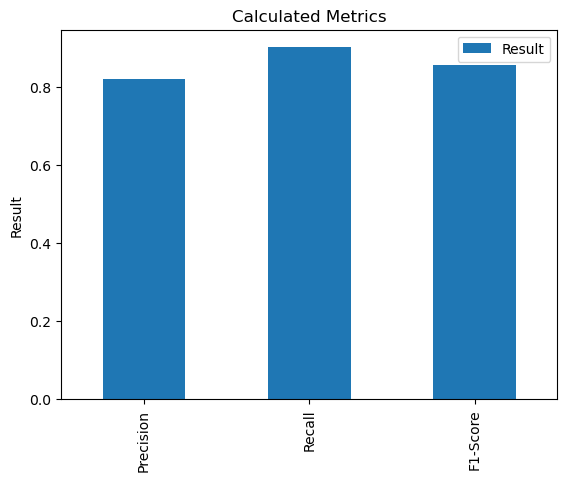

In [35]:
cv_metrics.T.plot(kind='bar')
plt.ylabel('Result')
plt.title('Calculated Metrics');

### Feature Importance

For the last part I checked importance of all features. Negative values mean that the feature is inversely proportional to the target.

In [36]:
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_df = pd.DataFrame(feature_dict, index=[0])

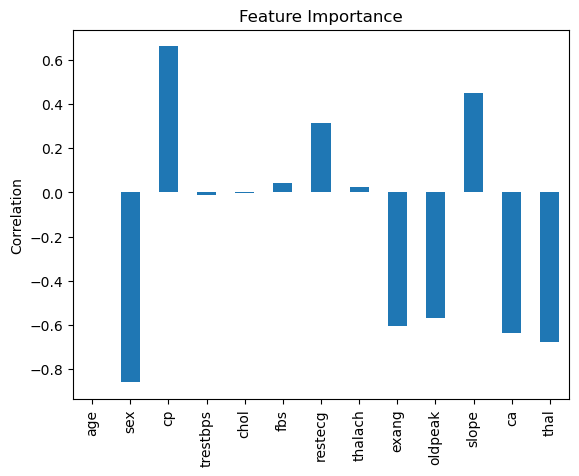

In [37]:
feature_df.T.plot(kind='bar', title='Feature Importance', legend=False)
plt.ylabel('Correlation');